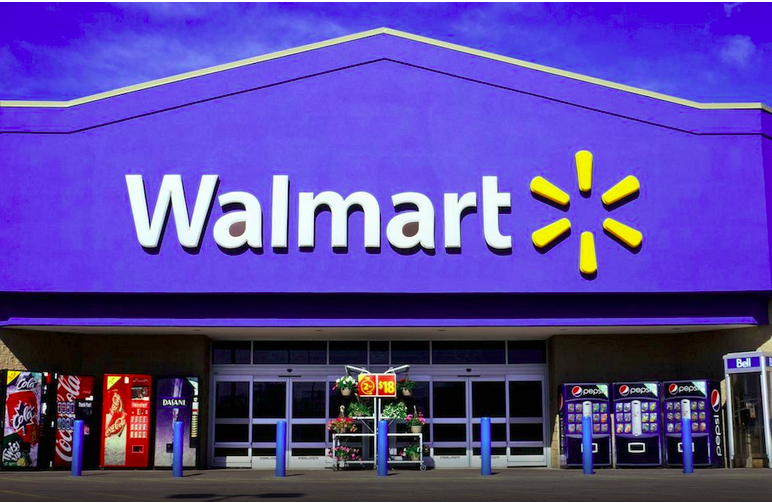



### Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

    Store - the store number

    Date - the week of sales

    Weekly_Sales -  sales for the given store

    Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

    Temperature - Temperature on the day of sale

    Fuel_Price - Cost of fuel in the region

    CPI – Prevailing consumer price index

    Unemployment - Prevailing unemployment rate


##### Basic Statistics tasks
1. You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:
a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?
b. If the weekly sales show a seasonal trend, when and what could be the reason?
c. Does temperature affect the weekly sales in any manner?
d. How is the Consumer Price index affecting the weekly sales of various stores?
e. Top performing stores according to the historical data.
f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.
2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks
















### Basic Statistical Tasks
 - Data Understanding 
 - Exploratory Data Analysis 
 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
data = pd.read_csv('../input/Walmart_Store_sales.csv')
display(data.head())
data1 = data.copy()
display(data.tail()) #Quater 4 is incomplete. We have data till october 2012 !

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


### Basic Insights Of Data

In [3]:
display(data.shape)                      # Shape of data 
display(data.info())                     # Info 
display(data.describe())                 # Description 
display(data.isnull().sum())             # Null values check,found none ! 

(6435, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


None

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
max_sales = data.groupby('Store')['Weekly_Sales'].sum()
max_sales.idxmax()

20

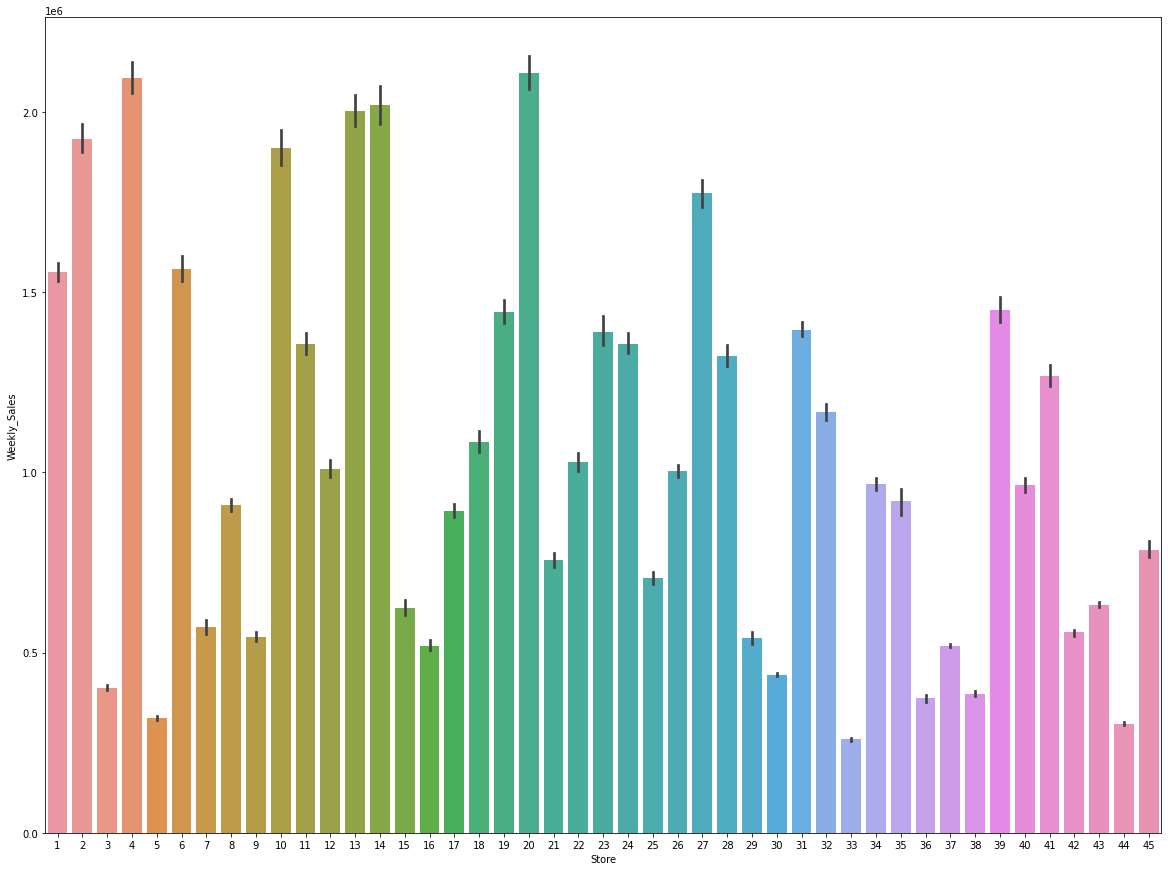

In [5]:
plt.figure(figsize=(20,15))
sns.barplot(x=data.Store, y = data.Weekly_Sales)

#### Task 1 - Analysis : Clearly After looking at the plot you can infer that the Sotre 20 has maximum Weekly_Sales.

In [6]:
std_all = data.groupby('Store')['Weekly_Sales'].std()
#print(std_all,'\n')
print("And Maximum Standard Deviation is for the Store No. {} ".format(std_all.idxmax()))

And Maximum Standard Deviation is for the Store No. 14 


In [7]:
cv_all = ((data.groupby('Store')['Weekly_Sales'].std())/(data.groupby('Store')['Weekly_Sales'].mean()))*100
#print(cv_all,"\n")
print("And Maximum Coefficient of variation is for the Store No. {} ".format(cv_all.idxmax()))

And Maximum Coefficient of variation is for the Store No. 35 


#### Task 2 - Maximum Std is for store 14 and coefficient of variation is max for store 35, to draw more insights refer the plot

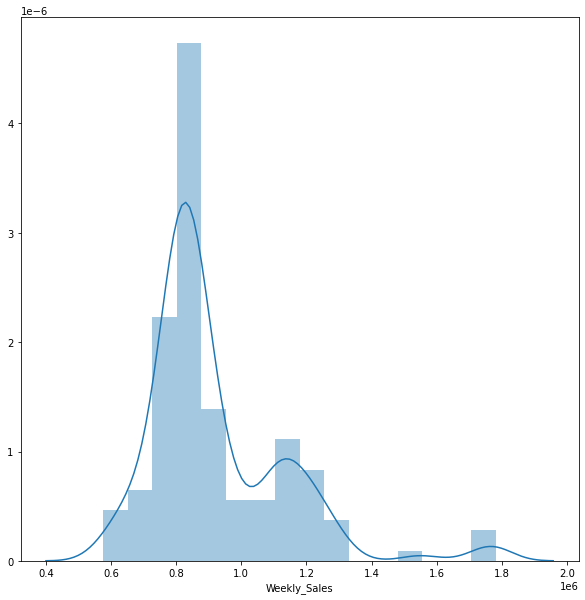

In [8]:
stores = data.groupby('Store')
store_35 = stores.get_group(35)
plt.figure(figsize=(10,10))
sns.distplot(store_35.Weekly_Sales)

#### Analysis

- Clearly in this distribution plot for store 35 you can see how the weekly_sales are distributed, it is rightly skewed and giving the intutions that sales are centred around 800000.

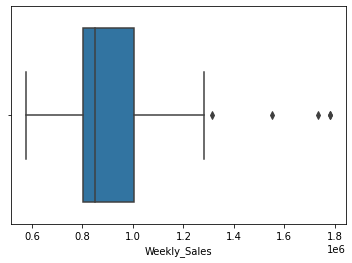

In [9]:
sns.boxplot(store_35.Weekly_Sales)

### Analysis
- This boxplot shows the weekly_sales for store 35 which has few outliers, clearly saying that it has highest coefficient of variation due to outliers as you can see in the above boxplot and distribution curve.

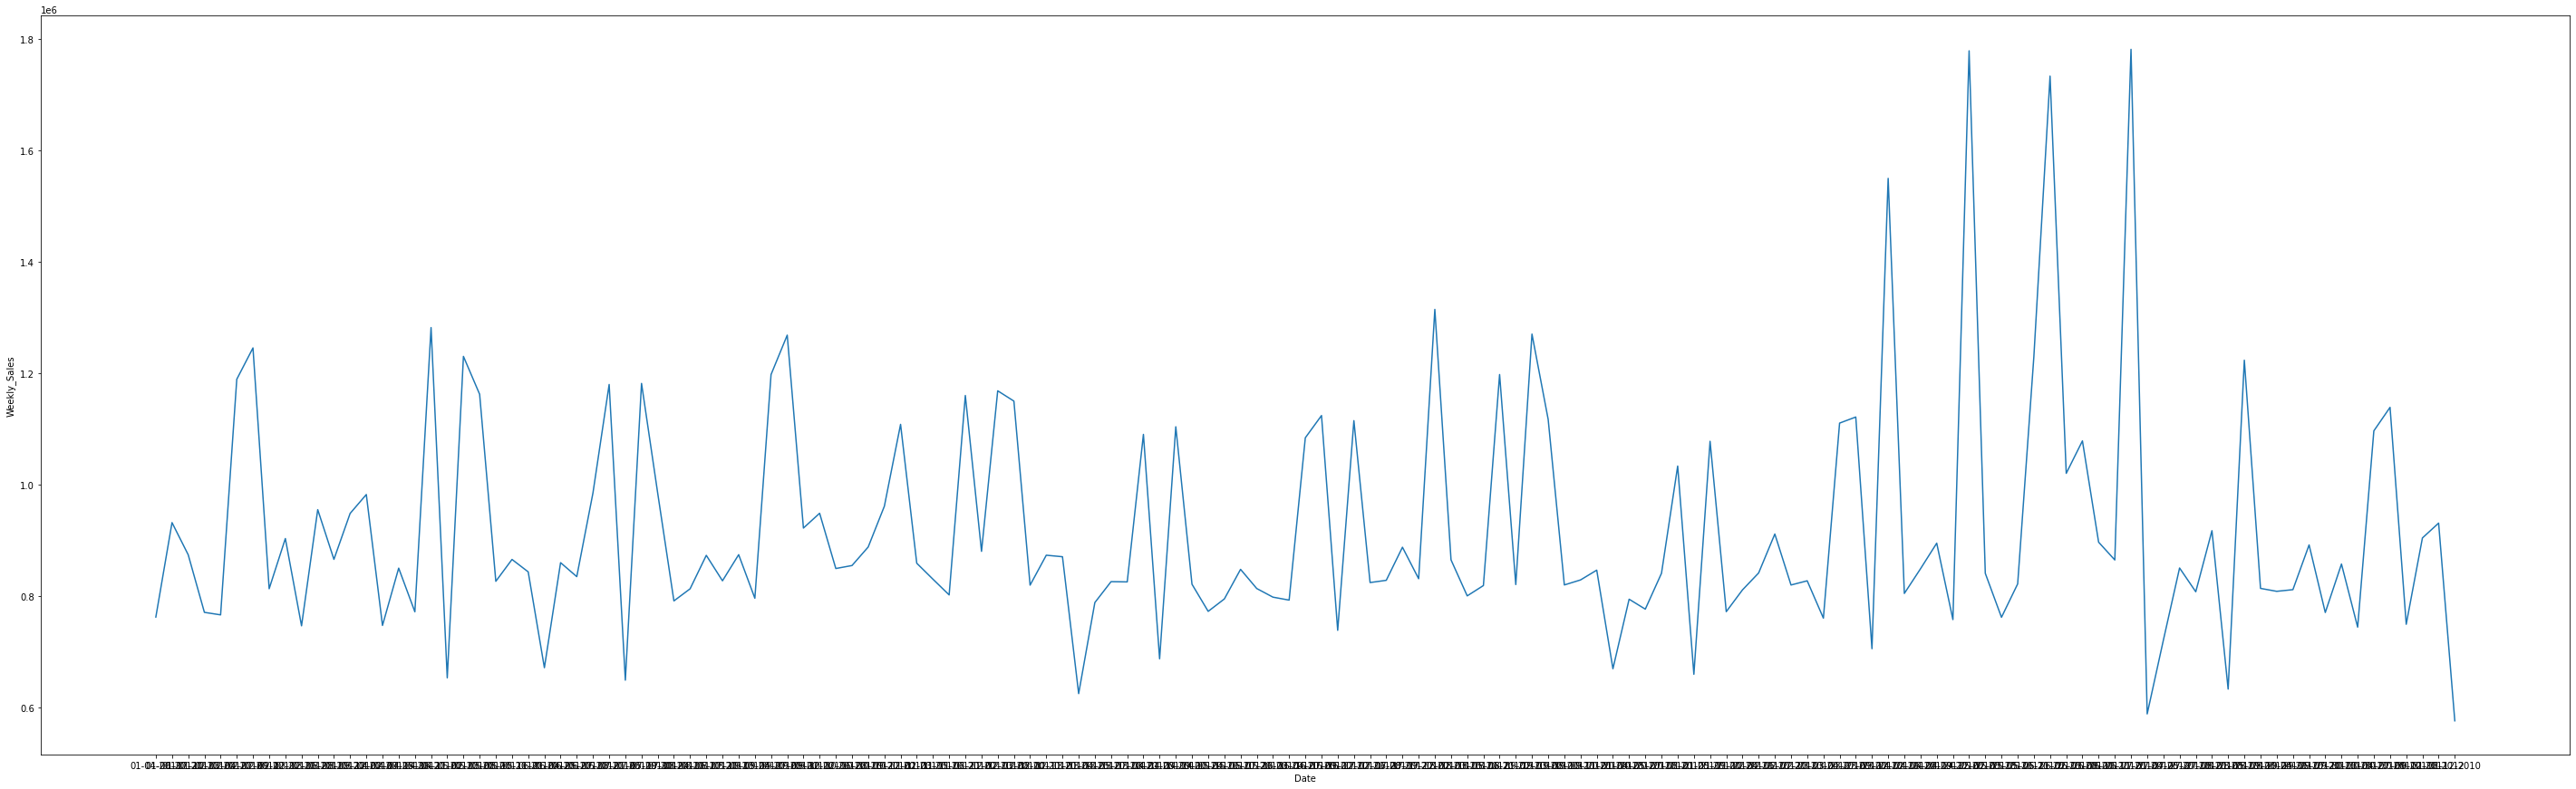

In [10]:
plt.figure(figsize=(50,15))
sns.lineplot(x='Date', y = 'Weekly_Sales', data = store_35)

#### Analysis 
- Also now if you look at this lineplot of Weekly_Sales for store 35 it is clear that how sales are varying with during a week of a year, which is highly variable. So you can say that there is very irregular sale pattern for store 35. During the holidays only it is seeing high amount of sales. So you can infer that the store35 will be seeing high demands in products due sudden rise in sales during holiday seasons.

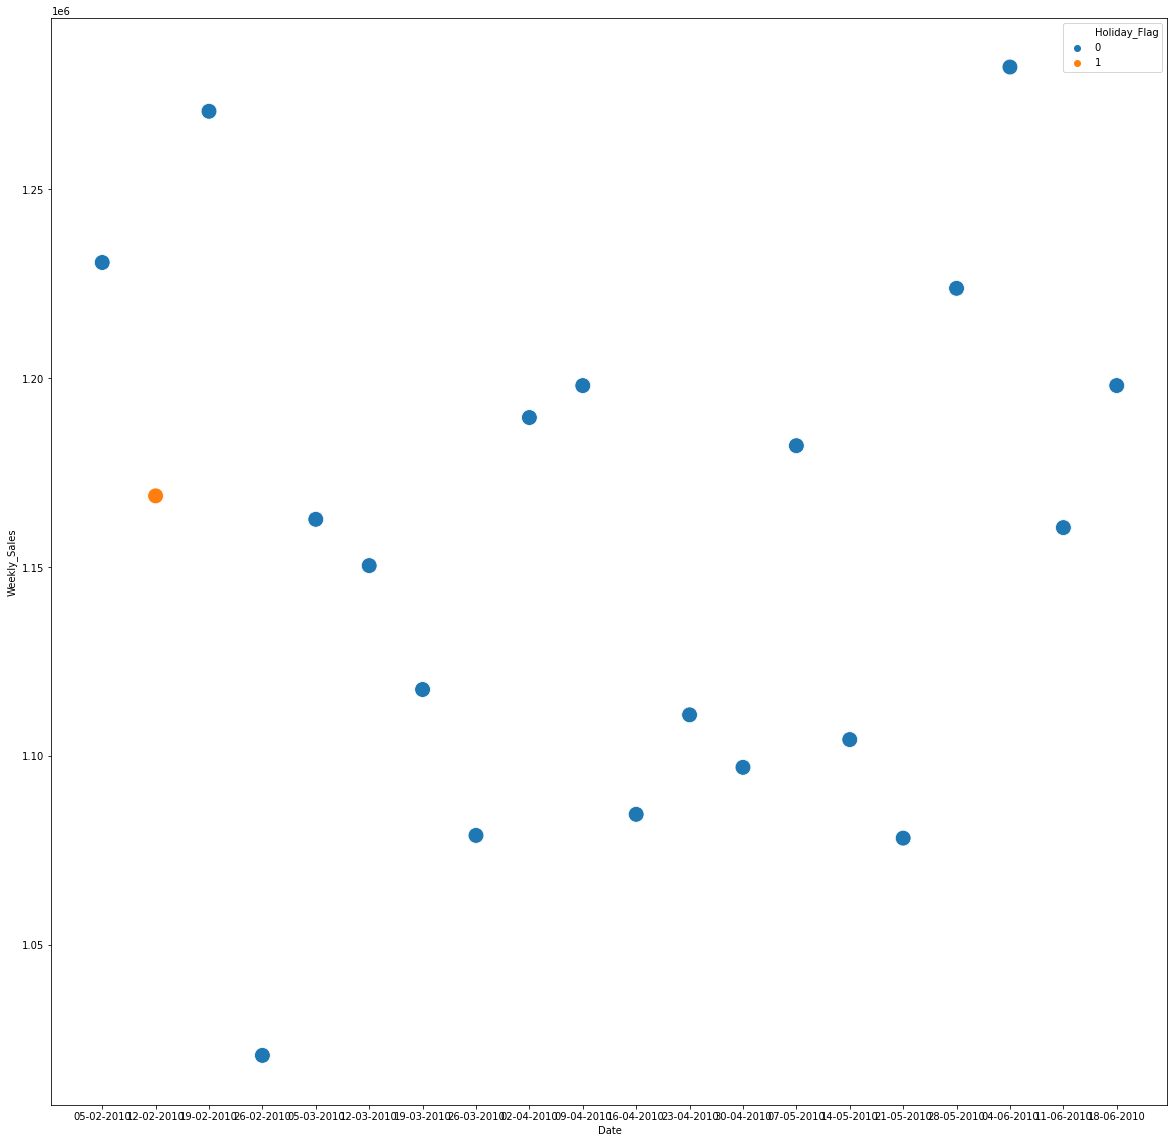

In [11]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Date', y = 'Weekly_Sales', hue = 'Holiday_Flag', data = store_35.head(20), s=250)

#### Analysis 

- As already infered store35 sees sudden rise of sales during holiday week, so on 5th feb 2010, it has more demand and have high weekly_sales more than the rest of non holiday weeks.

# Quatrely Growth Rate

* ##### So, we will be dividing the whole dataset into 4 quaters for year 2012, to analyse how weekly_sales varying for different stores in different quaters.

* ##### Grouping Data by Year

In [12]:
growth = data.copy()
growth['Date'] = pd.to_datetime(growth.Date,format='%d-%m-%Y')
growth['Year'], growth['Month'] = growth['Date'].dt.year, growth['Date'].dt.month
growth

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


In [13]:
# Now lets group data with year = 2012

growth_group = growth.groupby('Year',sort=False)
growth_group_2012 = growth_group.get_group(2012)
growth_group_2012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
100,1,2012-01-06,1550369.92,0,49.01,3.157,219.714258,7.348,2012,1
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,1
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,1
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,1
104,1,2012-02-03,1636339.65,0,56.55,3.360,220.172015,7.348,2012,2
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


## Displaying 4 Quaters of Year 2012

In [14]:
growth_group_2012_Quaters = growth_group_2012.groupby('Month')
growth_group_2012_Q1_1 = growth_group_2012_Quaters.get_group(1)
growth_group_2012_Q1_2 = growth_group_2012_Quaters.get_group(2)
growth_group_2012_Q1_3 = growth_group_2012_Quaters.get_group(3)

Quater_1 = growth_group_2012_Q1_1.append(growth_group_2012_Q1_2)
Quater_1 = Quater_1.append(growth_group_2012_Q1_3)
display(Quater_1.head())



growth_group_2012_Q2_4 = growth_group_2012_Quaters.get_group(4)
growth_group_2012_Q2_5 = growth_group_2012_Quaters.get_group(5)
growth_group_2012_Q2_6 = growth_group_2012_Quaters.get_group(6)
Quater_2 = growth_group_2012_Q2_4.append(growth_group_2012_Q2_5)
Quater_2 = Quater_2.append(growth_group_2012_Q2_6)
display(Quater_2.head())



growth_group_2012_Q3_7 = growth_group_2012_Quaters.get_group(7)
growth_group_2012_Q3_8 = growth_group_2012_Quaters.get_group(8)
growth_group_2012_Q3_9 = growth_group_2012_Quaters.get_group(9)
Quater_3 = growth_group_2012_Q3_7.append(growth_group_2012_Q3_8)
Quater_3 = Quater_3.append(growth_group_2012_Q3_9)
display(Quater_3.head())


# The last and minimum Quater ! 
growth_group_2012_Q4_10 = growth_group_2012_Quaters.get_group(10)
Quater_4 = growth_group_2012_Q4_10
display(Quater_4.head())



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
100,1,2012-01-06,1550369.92,0,49.01,3.157,219.714258,7.348,2012,1
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,1
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,1
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,1
243,2,2012-01-06,1799520.14,0,46.75,3.157,219.355063,7.057,2012,1


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
113,1,2012-04-06,1899676.88,0,70.43,3.891,221.435611,7.143,2012,4
114,1,2012-04-13,1621031.70,0,69.07,3.891,221.510210,7.143,2012,4
115,1,2012-04-20,1521577.87,0,66.76,3.877,221.564074,7.143,2012,4
116,1,2012-04-27,1468928.37,0,67.23,3.814,221.617937,7.143,2012,4
256,2,2012-04-06,2129035.91,0,68.43,3.891,221.073764,6.891,2012,4


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
126,1,2012-07-06,1769854.16,0,81.57,3.227,221.883779,6.908,2012,7
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908,2012,7
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908,2012,7
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908,2012,7
269,2,2012-07-06,2041507.40,0,84.20,3.227,221.521506,6.565,2012,7


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573,2012,10
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573,2012,10
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,2012,10
142,1,2012-10-26,1493659.74,0,69.16,3.506,223.444251,6.573,2012,10
282,2,2012-10-05,1998321.04,0,70.27,3.617,222.815930,6.170,2012,10


#### Plotting Weekly_Sales in Quater_1 of Year 2012 for all 45 Stores

* ##### Store 20 has made a leading edge differnce in Quater_1

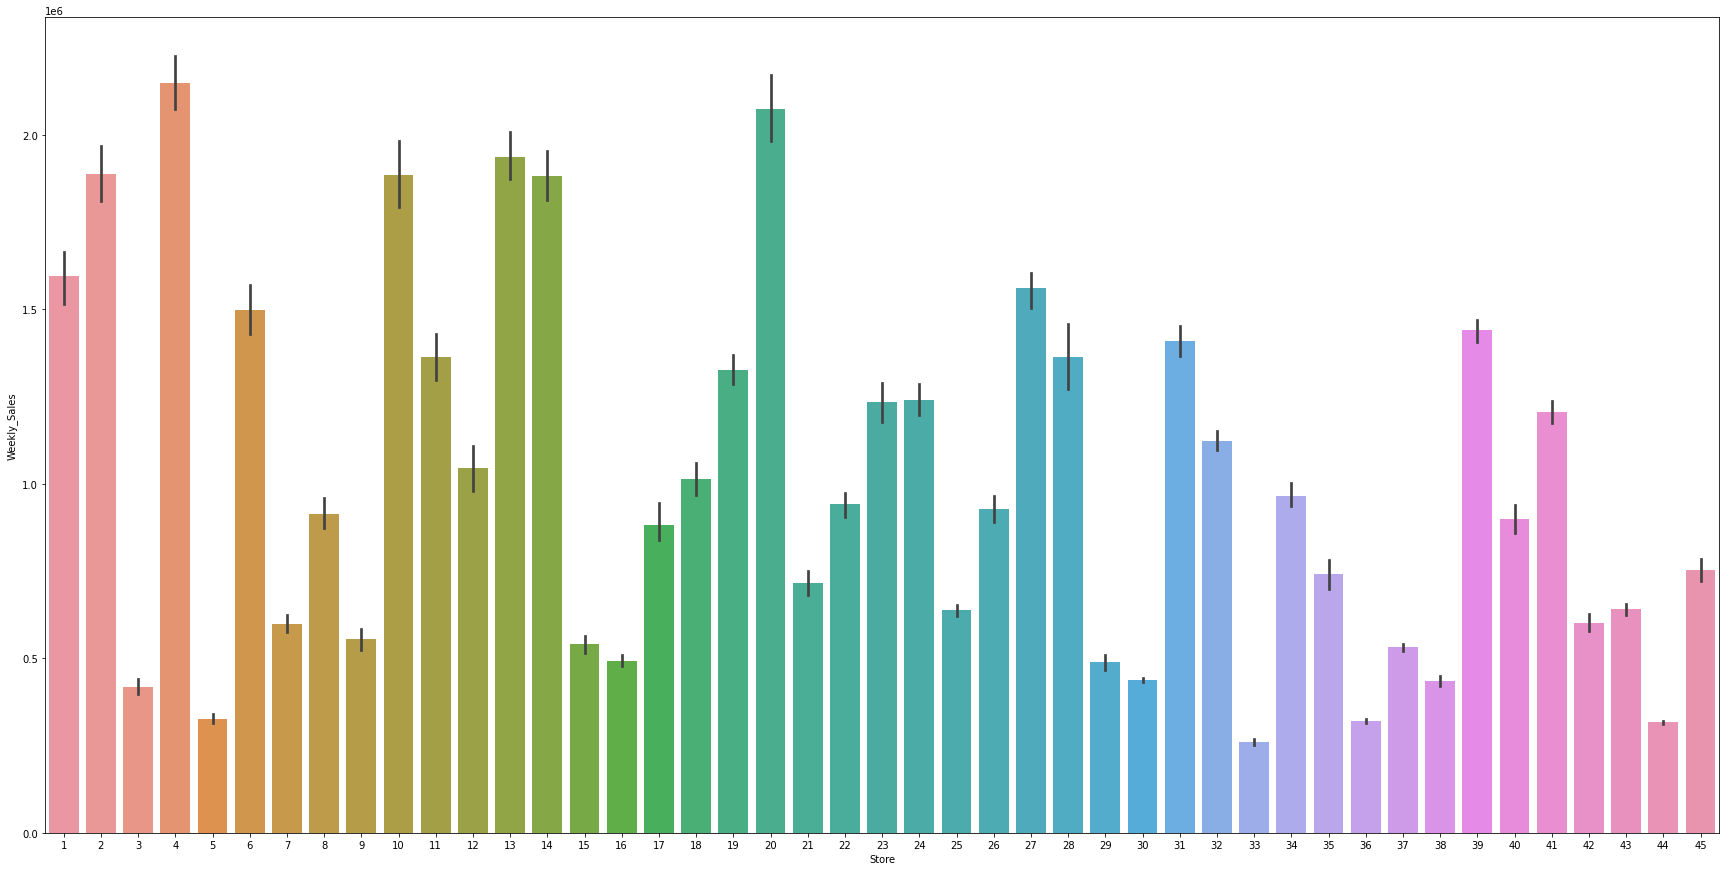

In [15]:
plt.figure(figsize=(30,15))
sns.barplot(x='Store', y = 'Weekly_Sales', data = Quater_1)

#### Grouping The Data Quater Wise to do further Analysis

In [16]:
df2 = pd.DataFrame(Quater_1.groupby('Store')['Weekly_Sales'].sum())
df2["Quater1_Sales"] = pd.DataFrame(Quater_1.groupby('Store')['Weekly_Sales'].sum())
df2["Quater2_Sales"] = pd.DataFrame(Quater_2.groupby('Store')['Weekly_Sales'].sum())
df2["Quater3_Sales"] = pd.DataFrame(Quater_3.groupby('Store')['Weekly_Sales'].sum())
df2["Quater4_Sales"] = pd.DataFrame(Quater_4.groupby('Store')['Weekly_Sales'].sum())
df2.drop('Weekly_Sales', axis = 1, inplace = True)

In [17]:
df2['Q3 - Q2'] = df2['Quater3_Sales'] - df2['Quater2_Sales']
df2['Overall Growth Rate in 2012 Q3 %'] = (df2['Q3 - Q2']/df2['Quater2_Sales'])*100
df2['Q2 - Q1'] = df2['Quater2_Sales'] - df2['Quater1_Sales']
df2['Overall Growth Rate in 2012 Q2 %'] = (df2['Q2 - Q1']/df2['Quater1_Sales'])*100
df2.head() #Displaying Few Rows..

,Quater1_Sales,Quater2_Sales,Quater3_Sales,Quater4_Sales,Q3 - Q2,Overall Growth Rate in 2012 Q3 %,Q2 - Q1,Overall Growth Rate in 2012 Q2 %
Store,,,,,,,,
1,20723762.83,20978760.12,20253947.78,6245587.29,-724812.34,-3.454982,254997.29,1.230458
2,24528220.70,25083604.88,24303354.86,7581514.93,-780250.02,-3.110598,555384.18,2.264266
3,5421809.72,5620316.49,5298005.47,1684307.82,-322311.02,-5.734749,198506.77,3.661264
4,27930310.30,28454363.67,27796792.46,8589722.81,-657571.21,-2.310968,524053.37,1.876289
5,4237380.83,4466363.69,4163790.99,1301302.62,-302572.70,-6.774475,228982.86,5.403877


In [18]:
print("The Store which has good growth in Quater 3 in 2012 is : ")
display(df2['Overall Growth Rate in 2012 Q3 %'].idxmax())


The Store which has good growth in Quater 3 in 2012 is : 


7

#### Plotting The data of growth rate in quater 3 of Year 2012.

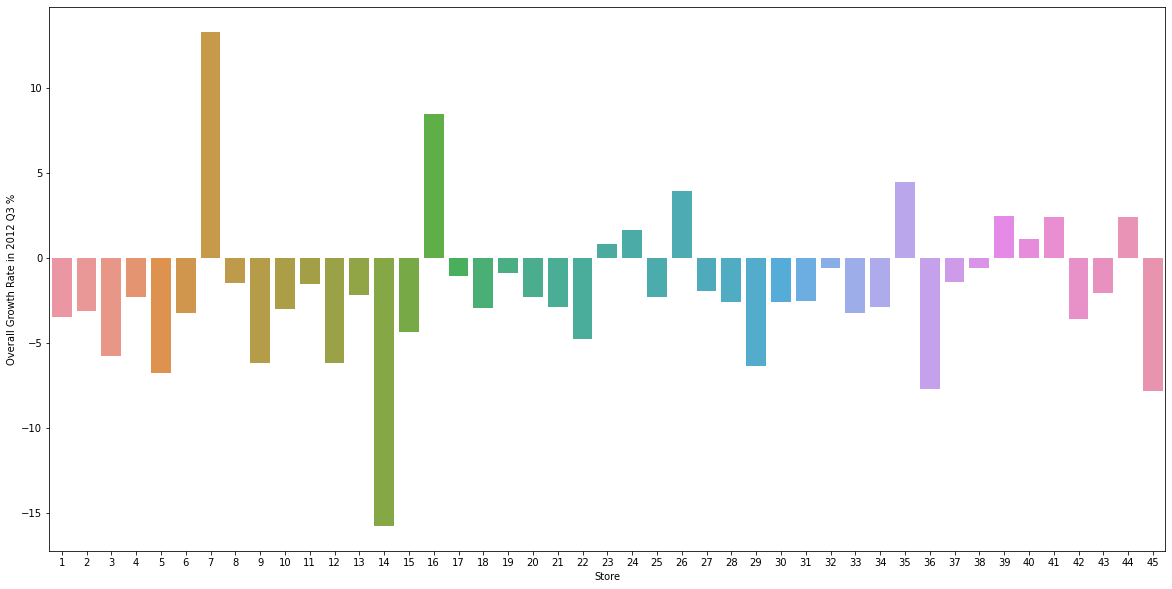

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(x=df2.index, y = 'Overall Growth Rate in 2012 Q3 %', data = df2)

#### Analysis 

* As you can see from the above plot there are few stores which have significantlly made enormous growth in quater3 in numbers, so store 7 has made the highest growth, but store 14 has been seeing a tough with it's sales during quater 3 and has significantlly facing a huge loss. Further Analysis can be by considering other variables like cpi and unemployment which made sotre 14 to see such a huge loss in quater 3 of year 2012. Also store 28 has also shown in terms of minimizing their loss in comparison to quater2, refer to the plot below for quater2.


In [20]:
#display(df2['Overall Growth Rate in 2012 Q2 %'])
#print('\n')
print("The Store which has good growth in Quater 2 in 2012 is : ")
display(df2['Overall Growth Rate in 2012 Q2 %'].idxmax())

The Store which has good growth in Quater 2 in 2012 is : 


23

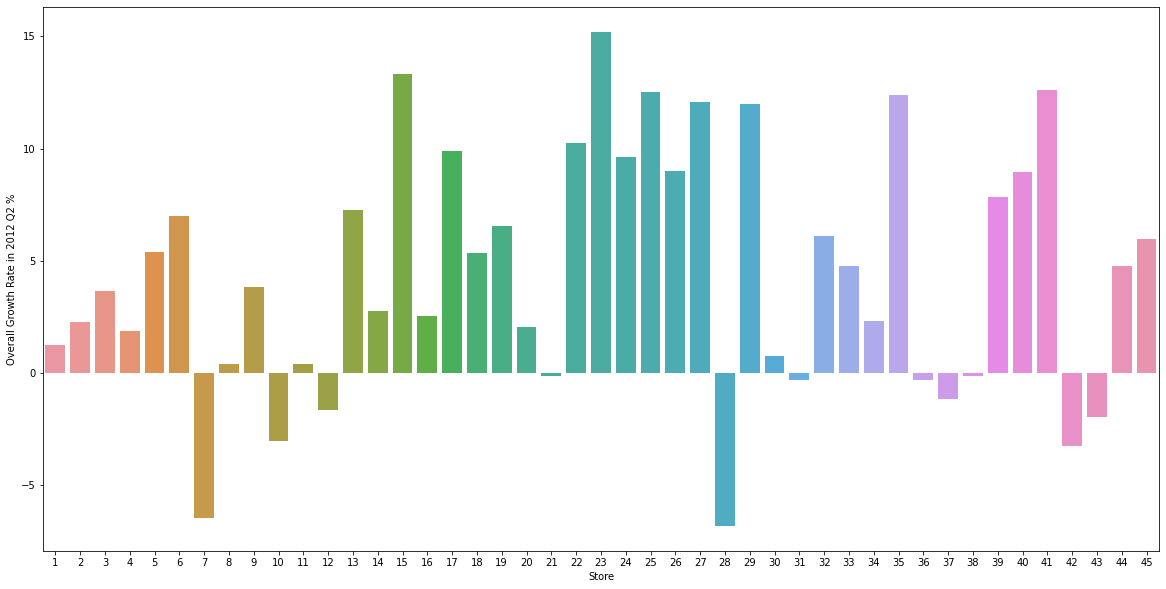

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(x=df2.index, y = 'Overall Growth Rate in 2012 Q2 %', data = df2)

#### Analysis 

* Now, as you can see from the above plot that in this quater, i.e. 2 of year 2012 store 7 really had a bad time in terms of weekly_sales, but now when we look at the plot of quater 3 store 7 has covered up from the losses, by making the highest growth in the quater in comparision to other stores. Store 28 is also not doing well in terms of growth in this quater. So walmart shoud invest money in marketing in the areas/city where store 7 and 28 are located so as to recover from overall loss by making a huge turnover in the consecutive quater.

### Sales During a Holiday Week 

* Grouping data holiday and non holiday week wise to analyse how weekly_sales varied in both the cases.

In [22]:
#Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in
#non-holiday season for all stores together
#------------------------------------------------------------------------------------------------------------------

data1['Date'] = pd.to_datetime(data1.Date, format = '%d-%m-%Y')
data1['Year'], data1['Month'] = data1['Date'].dt.year, data1['Date'].dt.month
holiday_group = data1.groupby('Holiday_Flag',sort=False)
holiday_week = holiday_group.get_group(1)
display(holiday_week.shape)
display(holiday_week.info())
display(holiday_week.describe())
display(holiday_week.head())

(450, 10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 1 to 6427
Data columns (total 10 columns):
Store           450 non-null int64
Date            450 non-null datetime64[ns]
Weekly_Sales    450 non-null float64
Holiday_Flag    450 non-null int64
Temperature     450 non-null float64
Fuel_Price      450 non-null float64
CPI             450 non-null float64
Unemployment    450 non-null float64
Year            450 non-null int64
Month           450 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 38.7 KB


None

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
count,450.000000,4.500000e+02,450.0,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,23.000000,1.122888e+06,1.0,50.232044,3.227464,171.268092,8.074127,2010.800000,7.900000
std,13.001627,6.276849e+05,0.0,20.071118,0.407934,39.291449,1.879293,0.749164,4.015699
min,1.000000,2.153592e+05,1.0,10.240000,2.513000,126.114581,4.077000,2010.000000,2.000000
25%,12.000000,5.758655e+05,1.0,33.367500,2.943000,131.586613,7.015000,2010.000000,2.000000
50%,23.000000,1.018538e+06,1.0,47.870000,3.179000,182.598178,7.890000,2011.000000,9.000000
75%,34.000000,1.555213e+06,1.0,67.335000,3.546000,211.760416,8.625000,2011.000000,11.000000
max,45.000000,3.004702e+06,1.0,96.220000,4.124000,226.210354,14.313000,2012.000000,12.000000


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787,2010,9
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,2011,2


In [23]:
non_holiday_week = holiday_group.get_group(0)
non_holiday_week.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,2010,3


### Plotting Weekly_Sales of Holiday_Week against Non_Holiday_Week. To get more insights out of the data

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


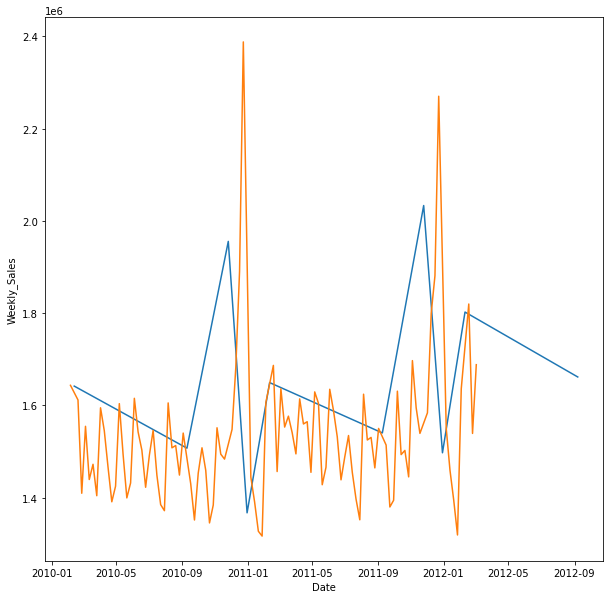

In [24]:
plt.figure(figsize=(10,10))
sns.lineplot(x='Date', y = 'Weekly_Sales', data = holiday_week.head(10), sort=False)
sns.lineplot(x='Date', y = 'Weekly_Sales', data = non_holiday_week.head(100), sort = False)

#Holidays.

# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13 
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

#### Analysis

* Any way, you can form the picture from the above lineplot that most of the holiday dates are performing better than Non holiday dates in terms of Sales, so basically walmart has to keep their supply chain smooth to keep their store vendors ready to handle such sudden increase demands of product during the holiday season. Moreover, people usually buy products on weekends too. So mostly for all the hoidays the mean sales are more than that of non hoiday weeks. Below is the dataframe which has mean of Weekly_Sales in Holiday week months and non holiday months, so you can refer it to get more insights.

In [25]:
v=holiday_week.groupby(['Month', 'Year'],sort=False)['Weekly_Sales'].mean()
v1 = pd.DataFrame(v)
v1

,,Weekly_Sales
Month,Year,
2,2010,1.074148e+06
9,2010,1.014098e+06
11,2010,1.462689e+06
12,2010,8.985004e+05
2,2011,1.051915e+06
9,2011,1.039183e+06
11,2011,1.479858e+06
12,2011,1.023166e+06
2,2012,1.111320e+06


* These are the mean of Weekly_Sales during holiday season for all the given years and their months. Starting from year 2010, in the month of Feb we had super bowl because of which we have seen increase in Weekly_Sales. Which is More than the whole month Weekly_sales mean across all 45 store for year 2010 in month of Feb. So super bowl did have an impact in terms of Weekly_Sales of Walmart Stores.

In [26]:
val = non_holiday_week.groupby(['Month', 'Year'],sort=False)['Weekly_Sales'].mean()
val1 = pd.DataFrame(val)
val1.head()

,,Weekly_Sales
Month,Year,
2,2010,1.051824e+06
3,2010,1.010666e+06
4,2010,1.028499e+06
5,2010,1.037283e+06
6,2010,1.068034e+06


* Weekly_Sales During non holiday season overall, which farely does not include sales during holiday weeks and you can see weekly_sales in feb 2010 of non holiday season across all 45 stores is less than that of date 12 feb 2010, on the day when we had superbowl, clearly stating that superbowl has made the impact on sales in a positive manner. which tells us to be ready with certain products which we have sold last year more in number. Like softdrinks and snacks to complete the orders placed. 

### Month and Sem Wise Sales in 2010

* Let's See Monthwise Weekly_Sales and Semwise for all the Years.

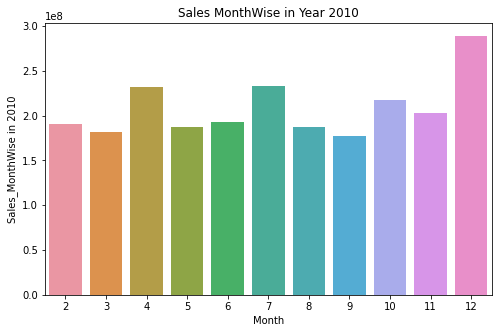

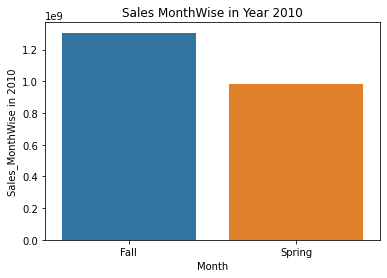

<Figure size 432x288 with 0 Axes>

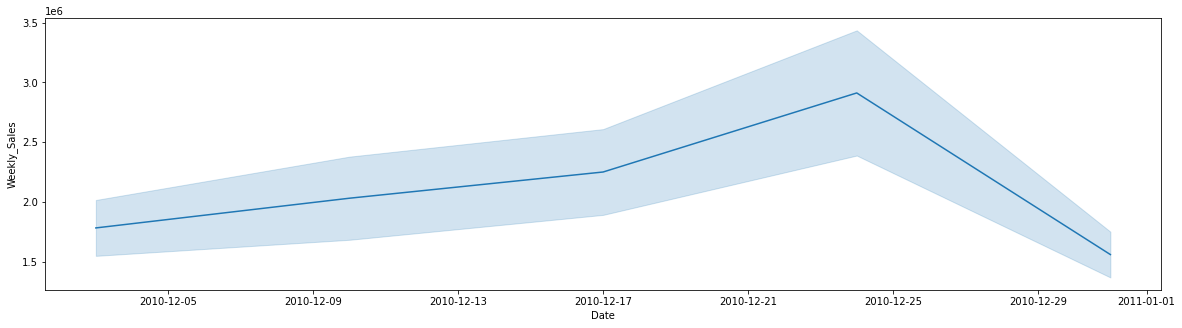

<Figure size 432x288 with 0 Axes>

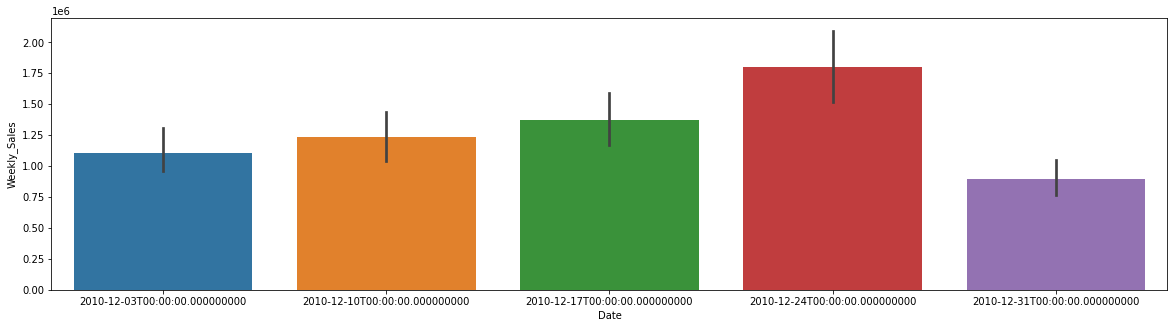

In [27]:
#MonthWise

groups = growth.groupby('Year')[['Month','Store', 'Weekly_Sales', 'Date']]
group2010 = groups.get_group(2010)
gr = group2010.groupby('Month')
month_2010 = [2,3,4,5,6,7,8,9,10,11,12]
sale_monthWise = []

for i in month_2010:
    val = gr.get_group(i)['Weekly_Sales'].sum()
    sale_monthWise.append(val)
 
month_fallSem  = [7,8,9,10,11,12]
month_springsem = [2,3,4,5,6]
total_spring = sum(sale_monthWise[0:5])
total_fall   = sum(sale_monthWise[5:])
semwise =[total_fall,total_spring]
semval = ['Fall', 'Spring']

plt.figure(figsize=(8,5))
plt.xlabel("Month")
plt.ylabel("Sales_MonthWise in 2010")
plt.title('Sales MonthWise in Year 2010')
sns.barplot(x=month_2010,y=sale_monthWise)
plt.figure()
sns.barplot(x=semval, y = semwise)
plt.xlabel("Month")
plt.ylabel("Sales_MonthWise in 2010")
plt.title('Sales MonthWise in Year 2010')
plt.figure()

#Grouping by month 12 to analyse more which date has more weekly_Sales.
group2010Months = group2010.groupby('Month')[['Weekly_Sales', 'Store', 'Date']]
group2010month12 = group2010Months.get_group(12)
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y = 'Weekly_Sales', data = group2010month12.head(10))
plt.figure()
plt.figure(figsize=(20,5))
sns.barplot(x='Date', y = 'Weekly_Sales', data = group2010month12)

### Analysis 

* Plot 1, shows the monthwise histogram of Weekly_Sales in year 2010 acorss all the 45 Stores. After Analysing we got to know that the month has done fairly better than other months in 2010. So we thought of plotting month 12, to analyse which Because of which date acrosss all 45 stores we are seeing this sudden increase in Weekly_Sales.

* Plot 2, is a barplot of sem wise weekly_Sales where Fall Sem is doing fairly better than Spring sem. You may ask why is it so ? Reason being Events Like SuperBowl which is being organised in the monthf Feb, is most likely to domninate over the other Holidays like that of Christmas.

* Last Two Plots Talks about the how sales are varying in month of december. On plotting we found out that Because of Christmas we have more sales during the month of december. Provided that these sales beating the sales of the month feb when superbowl was organised. Which is putting fall sem ahead of Spring sem Collectively

* Moreover, due to high increase in Sales during fall sem Walmart may wanna channelise their supply chain across all the 45 stores during fall sem in order to  perform in consecutive quater of the next Year. Mainly Between september and December , very important Months.

### Month and Sem Wise Sales in 2011

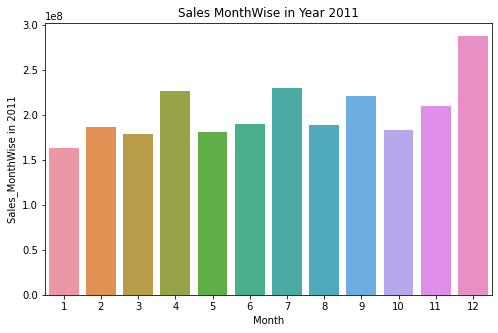

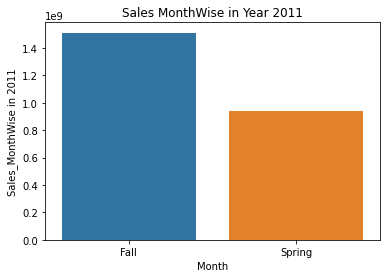

<Figure size 432x288 with 0 Axes>

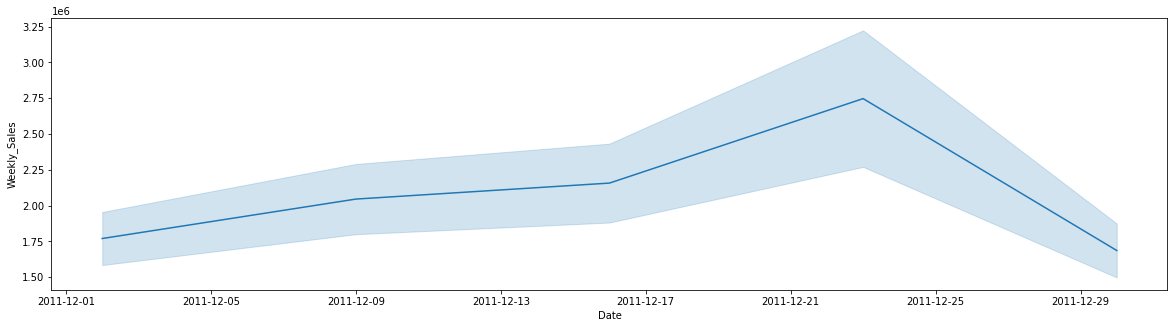

<Figure size 432x288 with 0 Axes>

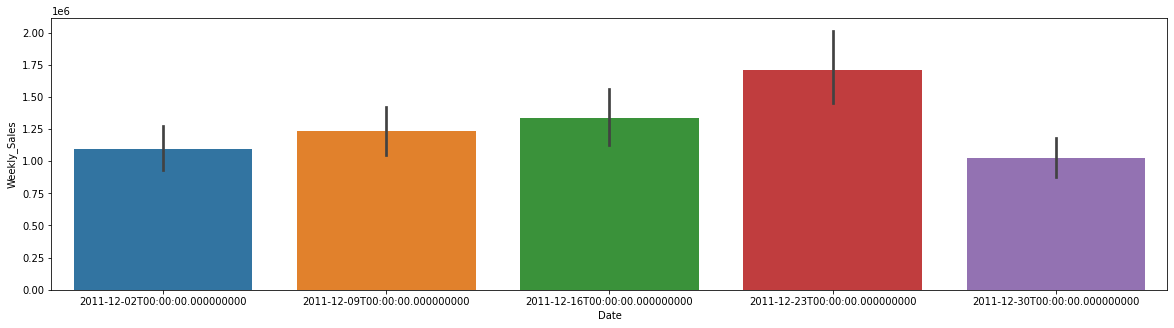

In [28]:
#MonthWise

groups = growth.groupby('Year')[['Month','Store', 'Weekly_Sales', 'Date']]
group2011 = groups.get_group(2011)
gr = group2011.groupby('Month')
month_2011 = [1,2,3,4,5,6,7,8,9,10,11,12]
sale_monthWise = []

for i in month_2011:
    val = gr.get_group(i)['Weekly_Sales'].sum()
    sale_monthWise.append(val)
 
month_fallSem  = [7,8,9,10,11,12]
month_springsem = [1,2,3,4,5,6]
total_spring = sum(sale_monthWise[0:5])
total_fall   = sum(sale_monthWise[5:])
semwise =[total_fall,total_spring]
semval = ['Fall', 'Spring']

plt.figure(figsize=(8,5))
plt.xlabel("Month")
plt.ylabel("Sales_MonthWise in 2011")
plt.title('Sales MonthWise in Year 2011')
sns.barplot(x=month_2011,y=sale_monthWise)
plt.figure()
sns.barplot(x=semval, y = semwise)
plt.xlabel("Month")
plt.ylabel("Sales_MonthWise in 2011")
plt.title('Sales MonthWise in Year 2011')
plt.figure()

#Grouping by month 12 to analyse more which date has more weekly_Sales.
group2011Months = group2011.groupby('Month')[['Weekly_Sales', 'Store', 'Date']]
group2011month12 = group2011Months.get_group(12)
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y = 'Weekly_Sales', data = group2011month12.head(10))
plt.figure()
plt.figure(figsize=(20,5))
sns.barplot(x='Date', y = 'Weekly_Sales', data = group2011month12)



### Analysis 

* Again, in this Plot you can see for the month Decembde Sales are Pretty high than other months and hence Fall sem is doing better than Spring Sem. So we analysed Month 12 again and found out that During christmas Period Sales in the month of December are fairly more than the other Dates. Also Christmas week is a Holiday_Week, by this our previous analysis on which holiday season dates have their mean sales more than the other dates gets justified, why ? these Holiday seasons are doing better than non holiday seasons.

### Month and Sem Wise Sales in 2012

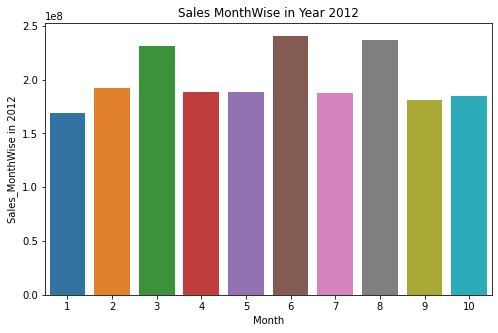

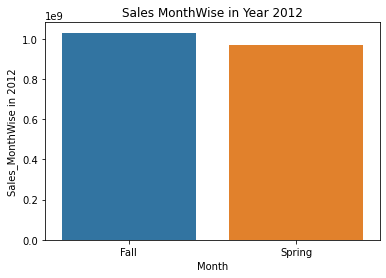

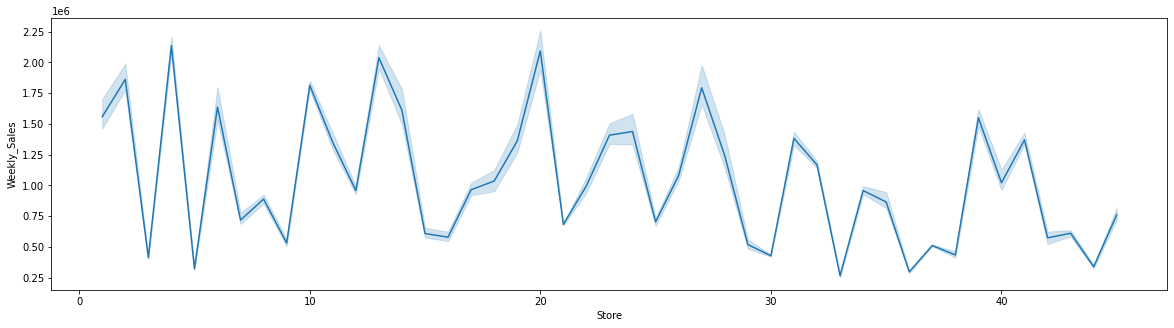

<Figure size 432x288 with 0 Axes>

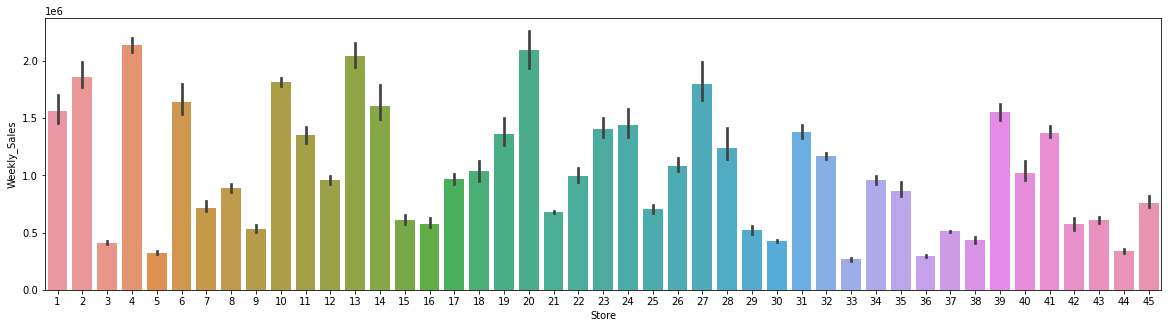

In [29]:
#MonthWise

groups = growth.groupby('Year')[['Month','Store', 'Weekly_Sales', 'Date']]
group2012 = groups.get_group(2012)
gr = group2012.groupby('Month')
month_2012 = [1,2,3,4,5,6,7,8,9,10]
sale_monthWise = []

for i in month_2012:
    val = gr.get_group(i)['Weekly_Sales'].sum()
    sale_monthWise.append(val)
 
month_fallSem  = [7,8,9,10]
month_springsem = [1,2,3,4,5,6]
total_spring = sum(sale_monthWise[0:5])
total_fall   = sum(sale_monthWise[5:])
semwise =[total_fall,total_spring]
semval = ['Fall', 'Spring']

plt.figure(figsize=(8,5))
plt.xlabel("Month")
plt.ylabel("Sales_MonthWise in 2012")
plt.title('Sales MonthWise in Year 2012')
sns.barplot(x=month_2012,y=sale_monthWise)
plt.figure()
sns.barplot(x=semval, y = semwise)
plt.xlabel("Month")
plt.ylabel("Sales_MonthWise in 2012")
plt.title('Sales MonthWise in Year 2012')

#Grouping by month 7 to analyse more which date has more weekly_Sales.
group2012Months = group2012.groupby('Month')[['Weekly_Sales', 'Store', 'Date']]
group2012month7 = group2012Months.get_group(7)
plt.figure(figsize=(20,5))
sns.lineplot(x='Store', y = 'Weekly_Sales', data = group2012month7)
plt.figure()
plt.figure(figsize=(20,5))
sns.barplot(x='Store', y = 'Weekly_Sales', data = group2012month7)


#### Analysis

* Plot 1 and Plot 2 gives monthly and semester view of Weekly_Sales in Year 2012
* We are analysisng this year on the basis of Sotres and Weekly_Sales in month 7 at the Start of Quater3, so we can see that the store 7 is making enough ptofit to cover up the losses made in the last quater and to make a profit in turnover by the end of year 2012
* Also We have data till october 2012, so we cannot provide sales done at the of year, because of which you can see now almost both semesters have fairly equal amount of sales. By which we can conclude that Walmart is making a huge profit at the end of year during Christmas acrosss all the 45 stores.

### Hypothesis of Factors like CPI, Unemployment and Fuel_price on Weekly_Sales, Creating a Day Column.
###  Statistical Modelling For Store 1

In [30]:
#let's Group the data.

hypothesis = growth.groupby('Store')[['Fuel_Price','Unemployment', 'CPI','Weekly_Sales', 'Holiday_Flag']]
factors  = hypothesis.get_group(1)
day_arr = [1]
for i in range (1,len(factors)):
    day_arr.append(i*7)
    
factors['Day'] = day_arr.copy()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [31]:
factors

,Fuel_Price,Unemployment,CPI,Weekly_Sales,Holiday_Flag,Day
0,2.572,8.106,211.096358,1643690.90,0,1
1,2.548,8.106,211.242170,1641957.44,1,7
2,2.514,8.106,211.289143,1611968.17,0,14
3,2.561,8.106,211.319643,1409727.59,0,21
4,2.625,8.106,211.350143,1554806.68,0,28
...,...,...,...,...,...,...
138,3.666,6.908,222.981658,1437059.26,0,966
139,3.617,6.573,223.181477,1670785.97,0,973
140,3.601,6.573,223.381296,1573072.81,0,980
141,3.594,6.573,223.425723,1508068.77,0,987


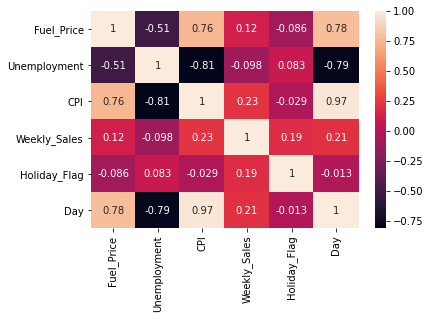

In [32]:
sns.heatmap(factors.corr(), annot = True)

* Only Few Variables have a positive correlation and have a value greater than zero, which shows how strongly these variables are correlated with Weekly_Sales. By looking at the heatmap we can conclude that CPI and Holiday_Flag is fairly strongly correlated to Weekly_Sales. As, we have already seen that for the Holiday_Flag = 1 means it's holiday_week we have sales more than the non_holiday_weeks. Also CPI, Fuel_Price and Unemployment are strongly negatively Correlated. Also Days and Rate of Unemployment are strongly negatively correlated. So we can say as the Fuel_price and Cpi goes high, rate of Unemployment Fairly Decreases. Refer to the line-regression plot given below.

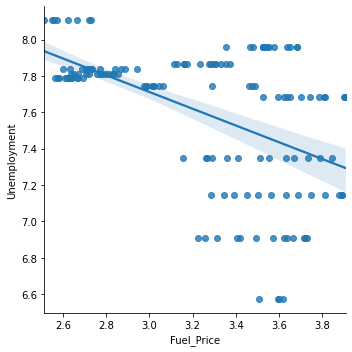

<Figure size 432x288 with 0 Axes>

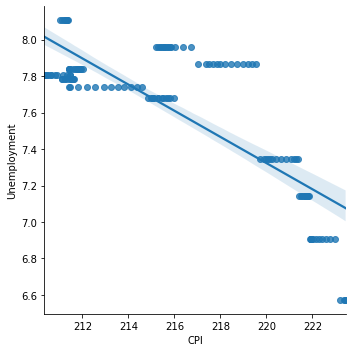

In [33]:
sns.lmplot(x='Fuel_Price', y = 'Unemployment', data = factors)
plt.figure()
sns.lmplot(x='CPI', y = 'Unemployment', data = factors)

### Hypothesis of CPI, FuelPrice, Unemployment with Weekly_Sales.

### Hypothesis Testing - CPI 

3.106725927640744e-144
reject null hypothesis


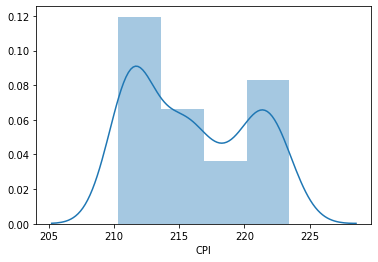

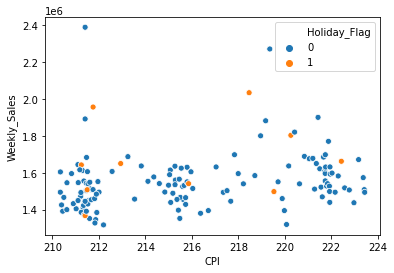

<Figure size 432x288 with 0 Axes>

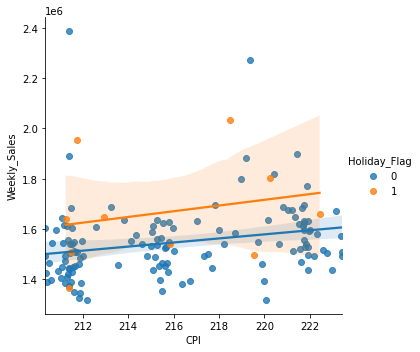

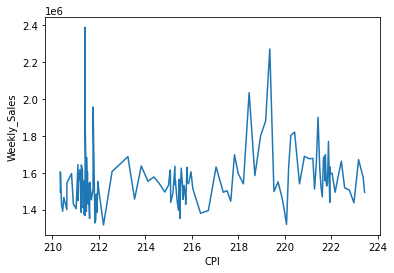

In [34]:
from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['CPI'])
sns.distplot(factors.CPI)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='CPI', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
plt.figure()
sns.lmplot(x='CPI', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
plt.figure()
sns.lineplot(x='CPI', y = 'Weekly_Sales', data = factors)

#### Analysis 

* From the above plots, you can see how Weekly_Sales and CPI are correlated to each other. Also we rejected the null hypothesis saying that ther is no relationship between Weekly_sales and CPI. But we found there is a positive corrlation between CPI and Weekly_sales, which we have found out by our statistical Modelling.

* Also The CPI is not normally distributed and line regression plot is showing how CPI is varying with Weekly_Sales on days of Holidays and non holiday weeks.

### Hypothesis Testing - Fuel_Price

3.050079726743709e-144
reject null hypothesis


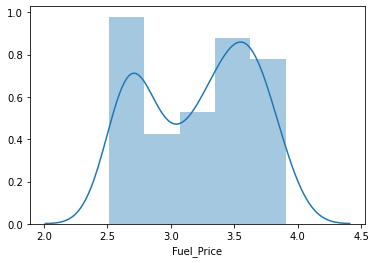

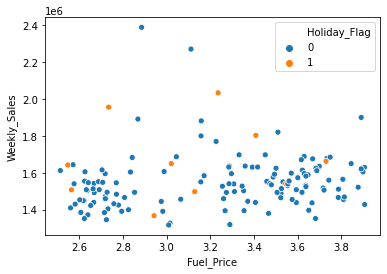

<Figure size 432x288 with 0 Axes>

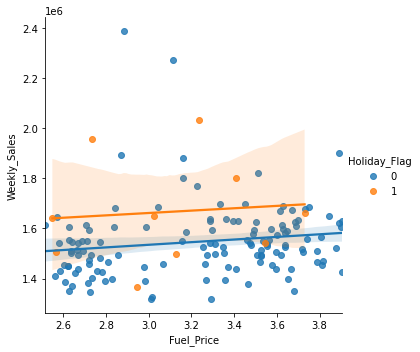

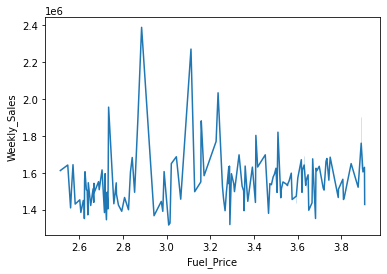

In [35]:
from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Fuel_Price'])
sns.distplot(factors.Fuel_Price)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
plt.figure()
sns.lmplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
plt.figure()
sns.lineplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors)

#### Analysis 

* We can slight growth in Weekly_Sales with increase in Fuel_Price as suggested by alternate Hypothesis and the correlation plot from above.

* It is unclear to comment on how mean is varying for Fuel_price as the distribution has two peaks and is varying alot. We can also see More numner of Sales when the Fuel_Price are higher speaking of which we can conclude that most of the people were able to afford the products sold. Whereas, we can see many Orange points i.e. Sales only during Holiday_Weeks when fuel_prices were fairly low.

### Hypothesis Testing - Uneployment

3.0515405336011733e-144
reject null hypothesis


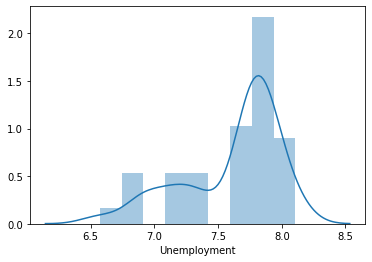

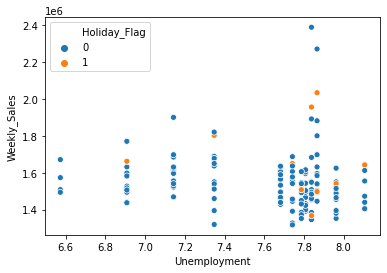

<Figure size 432x288 with 0 Axes>

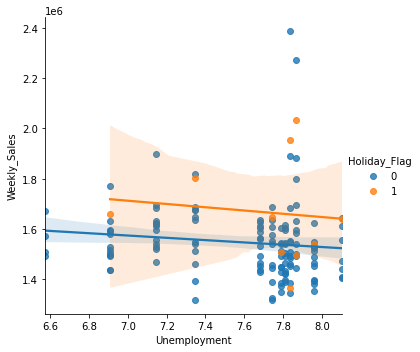

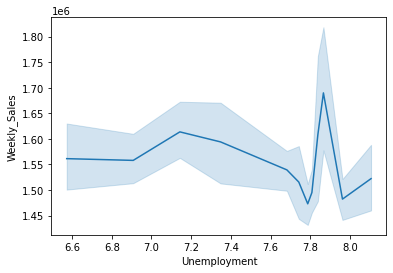

In [36]:
from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Unemployment'])
sns.distplot(factors.Unemployment)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='Unemployment', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
plt.figure()
sns.lmplot(x='Unemployment', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
plt.figure()
sns.lineplot(x='Unemployment', y = 'Weekly_Sales', data = factors)

#### Analysis 

* Plot 1 shows the distribution of Unemployment rate, whose mean is between 7.5 - 8.0, quite high. 
* Plot 2 and Plot 3 shows how weekly_sales are impacted because of rate of Unemployment as you can see as the rate of unemployment incrreases people only buy during holiday seasons, as there are only few outliers present for weekly_sales and which are on the day of Holiday. Speaking of which people only buy necessary products and try to save more.
* Also we reject null hypothesis as weekly_sales and rate of unemployment are negatively correlated as suggested by our heatmap of the correlation. P value is less than alpha hence we reject null hypothesis and accept alterante hypothesis

### Plotting Weekly_sales day wise for store 1, by keeping holidays as a parameter to get more insights.

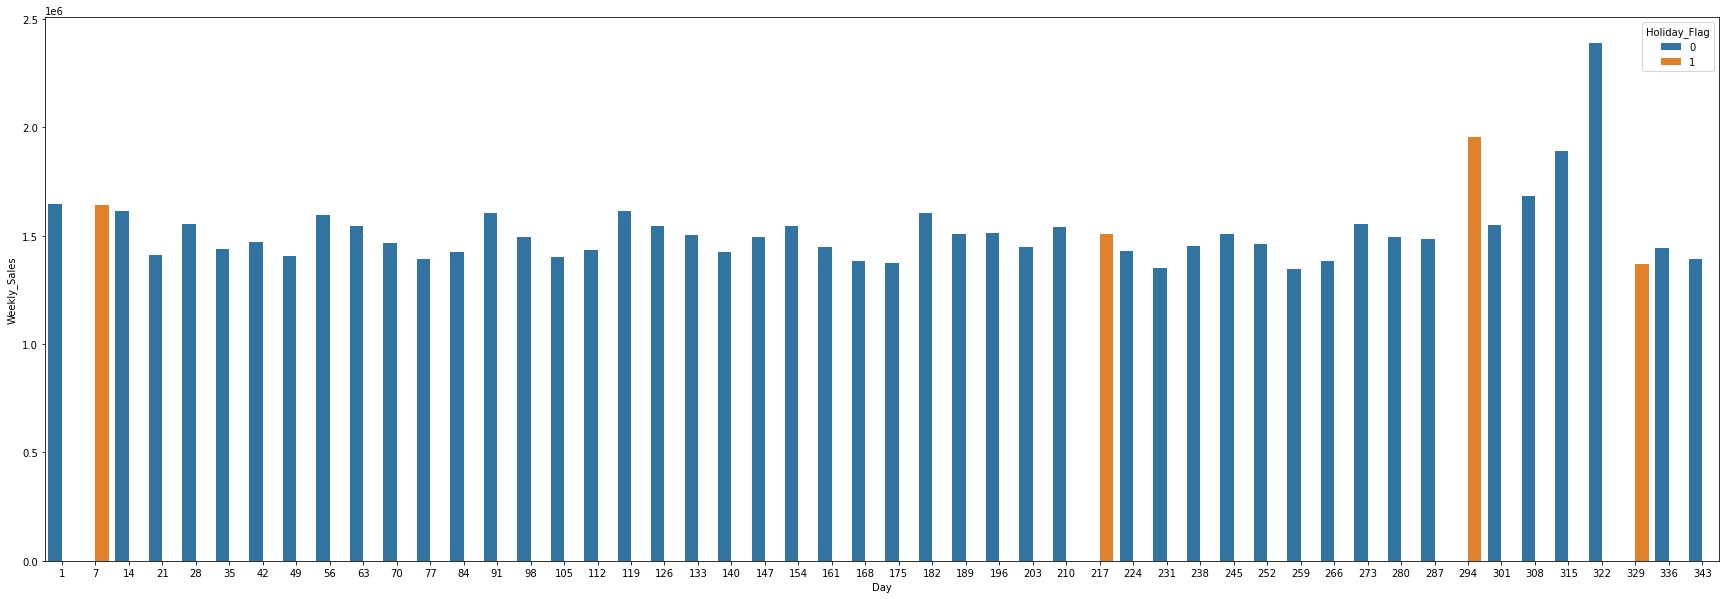

In [37]:
plt.figure(figsize=(30,10))
sns.barplot(x='Day', y = 'Weekly_Sales', data = factors.head(50), hue = 'Holiday_Flag')

# Random Forest: 
a. Build a Random Forest model where dependent variable is ‘Churn’ & independent 
variables are ‘tenure’ and ‘MonthlyCharges’
i. Divide the dataset in 70:30 ratio 
ii. Build the model on train set and predict the values on test set 
iii. Build the confusion matrix and calculate the accuracy

In [ ]:
randomForestClassifier_x = df[['tenure','MonthlyCharges']]
randomForestClassifier_y = df['Churn']

In [ ]:
randomForestClassifier_x_train, randomForestClassifier_x_test, randomForestClassifier_y_train, randomForestClassifier_y_test = train_test_split(randomForestClassifier_x,randomForestClassifier_y, test_size=0.30,random_state = 0) 

In [ ]:
randomForestClassifier = RandomForestClassifier(n_estimators=100)
randomForestClassifier.fit(randomForestClassifier_x_train,randomForestClassifier_y_train)

RandomForestClassifier()

In [ ]:
randomForestClassifier_y_pred = randomForestClassifier.predict(randomForestClassifier_x_test)

In [ ]:
randomForestClassifier_cm = confusion_matrix(randomForestClassifier_y_pred,randomForestClassifier_y_test)
randomForestClassifier_cm

array([[1350,  324],
       [ 210,  229]], dtype=int64)

In [ ]:
randomForestClassifier_score = accuracy_score(randomForestClassifier_y_pred,randomForestClassifier_y_test)
randomForestClassifier_score

#### ANALYSIS : 
- In the above plot you can see that on the days of holiday there is comparatively more sales for store1, infact more than the whole week. Clearly Customers Prefer going to Stores during a holiday week. More Importantly During christmas days the sales have gone really high.